https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Preparation phase**

In [4]:
#import dataset
dataset = pd.read_csv("wdbc.data", 
                      names=['sample_number','diagnostic','feat03','feat04','feat05','feat06','feat07','feat08','feat09','feat10','feat11','feat12','feat13','feat14','feat15','feat16',
                             'feat17','feat18','feat19','feat20','feat21','feat22','feat23','feat24','feat25','feat26','feat27','feat28','feat29','feat30','feat31','feat32'], skiprows=1)

In [5]:
#describe stats
dataset.describe()

,sample_number,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,feat11,...,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#data visualize
dataset.head()

,sample_number,diagnostic,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,...,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
#verify dimensions of dataset
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (568, 32)


In [8]:
#verify null values
dataset.isnull().sum()
dataset.isna().sum()

sample_number    0
diagnostic       0
feat03           0
feat04           0
feat05           0
feat06           0
feat07           0
feat08           0
feat09           0
feat10           0
feat11           0
feat12           0
feat13           0
feat14           0
feat15           0
feat16           0
feat17           0
feat18           0
feat19           0
feat20           0
feat21           0
feat22           0
feat23           0
feat24           0
feat25           0
feat26           0
feat27           0
feat28           0
feat29           0
feat30           0
feat31           0
feat32           0
dtype: int64

In [9]:
#define X samples and y results
X = dataset.iloc[:, 2:31].values
y = dataset.iloc[:, 1].values

In [10]:
X

array([[ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       [ 11.42  ,  20.38  ,  77.58  , ...,   0.6869,   0.2575,   0.6638],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [11]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M

**Phase 2 — Categorical Data**

Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.

For example, users are typically described by country, gender, age group etc.

We will use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [12]:
#encode Y dataset = M --> 1 and B --> 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

**Split Dataset in Train Dataset and Test Dataset**

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

We will do this using SciKit-Learn library in Python using the train_test_split method.

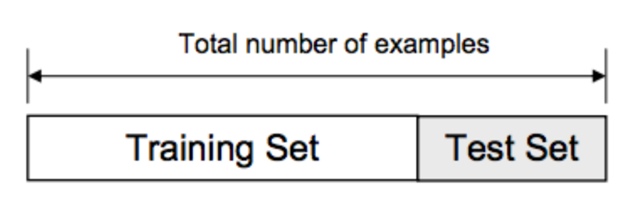

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
print("X train dimensions : {}".format(X_train.shape))
print("X test dimensions : {}".format(X_test.shape))
print("Y train dimensions : {}".format(Y_train.shape))
print("X test dimensions : {}".format(Y_test.shape))

X train dimensions : (426, 29)
X test dimensions : (142, 29)
Y train dimensions : (426,)
X test dimensions : (142,)


**Phase 3 - Scaling Data**

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

We will use StandardScaler method from SciKit-Learn library.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-0.54071162,  0.68488705, -0.53230722, ..., -0.51551942,
        -0.51945462, -1.02730757],
       [-0.42882223, -1.31963105, -0.45003493, ..., -1.07303798,
        -0.802171  , -0.86583411],
       [-0.8616575 , -1.08212891, -0.89336744, ..., -1.29711764,
        -1.5163697 , -0.15279293],
       ...,
       [-0.48182247, -0.30074685, -0.55063731, ..., -1.30638968,
        -1.52125728, -1.08326371],
       [-0.54071162,  1.78689701, -0.47689065, ...,  0.79462766,
         0.45745189,  0.48670589],
       [-0.03720937,  1.85577263, -0.04080492, ..., -0.68880157,
        -0.1702976 , -1.05608501]])

In [18]:
X_test

array([[ 0.11884688, -1.34813131,  0.08324292, ..., -0.13066072,
        -0.36793942, -0.45495612],
       [-0.34637742,  1.3760183 , -0.41465359, ..., -1.1099442 ,
        -0.86662606, -0.96655518],
       [-0.94410231, -0.50737371, -0.8784476 , ...,  0.96408037,
         0.60407951, -0.59244837],
       ...,
       [-1.6048386 , -0.83275165, -1.55580852, ..., -0.1478932 ,
        -0.16724286,  0.02466799],
       [-0.06959841, -1.46450736, -0.08641702, ..., -0.57726913,
        -0.22070085, -1.19997225],
       [ 1.14057366, -0.75675097,  1.18773767, ...,  0.48875116,
         1.43955147,  1.34363431]])

**Phase 4 — Model Selection**

This is the most exciting phase in Applying Machine Learning to any Dataset. It is also known as Algorithm selection for Predicting the best results.

Usually Data Scientists use different kinds of Machine Learning algorithms to the large data sets. But, at high level all those different algorithms can be classified in two groups : supervised learning and unsupervised learning.

Without wasting much time, I would just give a brief overview about these two types of learnings.

Supervised learning : Supervised learning is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. Supervised learning problems can be further grouped into Regression and Classification problems.

A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”.

A classification problem is when the output variable is a category like filtering emails “spam” or “not spam”

Unsupervised Learning : Unsupervised learning is the algorithm using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.

In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm of supervised learning.

We have different types of classification algorithms in Machine Learning :-

1. Logistic Regression

2. Nearest Neighbor

3. Support Vector Machines

4. Kernel SVM

5. Naïve Bayes

6. Decision Tree Algorithm

7. Random Forest Classification

Lets start applying the algorithms :

We will use sklearn library to import all the methods of classification algorithms.

We will use LogisticRegression method of model selection to use Logistic Regression Algorithm,

In [32]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred_logistRegression = classifier.predict(X_test)
Y_pred_logistRegression

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [33]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

Y_pred_knn = classifier.predict(X_test)
Y_pred_knn

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [34]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred_svmLinear = classifier.predict(X_test)
Y_pred_svmLinear

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [35]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred_svmRBF = classifier.predict(X_test)
Y_pred_svmRBF

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [36]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred_Gaussian = classifier.predict(X_test)
Y_pred_Gaussian

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [37]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred_DecisionTree = classifier.predict(X_test)
Y_pred_DecisionTree

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [38]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred_RandomForest = classifier.predict(X_test)
Y_pred_RandomForest


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

**Verify accuracy score - confusion matrix**

To check the accuracy we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

We will use Classification Accuracy method to find the accuracy of our models. Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

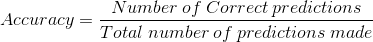

Fig: Accuracy


To check the correct prediction we have to check confusion matrix object and add the predicted results diagonally which will be number of correct prediction and then divide by total number of predictions.

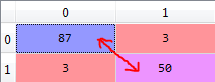

Fig: Confusion Matrix

After applying the different classification models, we have got below accuracies with different models:

In [43]:
#import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

#calc accuracy
cm_logistic = confusion_matrix(Y_test, Y_pred_logistRegression)
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_svmlinear = confusion_matrix(Y_test, Y_pred_svmLinear)
cm_svmrbf = confusion_matrix(Y_test, Y_pred_svmRBF)
cm_gaussian = confusion_matrix(Y_test, Y_pred_Gaussian)
cm_decisiontree = confusion_matrix(Y_test, Y_pred_DecisionTree)
cm_randomforest = confusion_matrix(Y_test, Y_pred_RandomForest)

In [45]:
#confusion matrix
print("logistic")
print(cm_logistic)

print("knn")
print(cm_knn)

print("svm linear")
print(cm_svmlinear)


logistic
[[91  1]
 [ 3 47]]
knn
[[91  1]
 [ 6 44]]
svm linear
[[90  2]
 [ 4 46]]


In [47]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score


print("Accuracy Logistic Regression : {}".format(accuracy_score(Y_test, Y_pred_logistRegression)*100))
print("Accuracy knn : {}".format(accuracy_score(Y_test, Y_pred_knn)*100))
print("Accuracy svm linear : {}".format(accuracy_score(Y_test, Y_pred_svmLinear)*100))
print("Accuracy svm rbf : {}".format(accuracy_score(Y_test, Y_pred_svmRBF)*100))
print("Accuracy Naive Bayes(Gaussian) : {}".format(accuracy_score(Y_test, Y_pred_Gaussian)*100))
print("Accuracy Decision Tree : {}".format(accuracy_score(Y_test, Y_pred_DecisionTree)*100))
print("Accuracy Random Forest : {}".format(accuracy_score(Y_test, Y_pred_RandomForest)*100))




Accuracy Logistic Regression : 97.1830985915493
Accuracy knn : 95.07042253521126
Accuracy svm linear : 95.77464788732394
Accuracy svm rbf : 95.77464788732394
Accuracy Naive Bayes(Gaussian) : 93.66197183098592
Accuracy Decision Tree : 90.14084507042254
Accuracy Random Forest : 93.66197183098592
